<a href="https://colab.research.google.com/github/LocoBunny04/ACMP2000-Data-ML/blob/main/Kawinthida_Clustering_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
# let's load back the standardized housing dataset we created in 02-Toolbox-Part3
import pandas as pd
from google.colab import drive

drive.mount('/content/gdrive')

housing_standard = pd.read_csv('gdrive/MyDrive/Colab Notebooks/housing.csv')
housing_standard.head()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [52]:
# Gathering datset with no geographical coordinates
housing_minus_coords = housing_standard.copy()
housing_minus_coords = housing_minus_coords.drop(["longitude", "latitude"], axis=1)
housing_minus_coords.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Identifying and Handling Missing Data

In [53]:
# calculate the median
median = housing_minus_coords["total_bedrooms"].median()

# create dataset with fixed dataset

option3 = housing_minus_coords.copy()
# Use the median to replace missing values in 'total_bedrooms'
option3["total_bedrooms"].fillna(median, inplace=True)
option3 = option3.drop("ocean_proximity", axis=1)

# Use the existing option3 dataset for clustering
housing_minus_coords = option3.copy()
housing_minus_coords.head()


/tmp/ipython-input-2832488702.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  option3["total_bedrooms"].fillna(median, inplace=True)


,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


K-Means

In [54]:
from sklearn.cluster import KMeans

# we create an instance of K-Means with three clusters, setting the random
# number generator seed to a fixed number for reproducibility
kmeans = KMeans(n_clusters=4, random_state=1, n_init="auto")

kmeans.fit(housing_minus_coords)

# Adding the labels to the housing_minus_coords dataframe
# copies the housing_minus_coords_numeric dataframe and names it to appropiate cluster
house_min_coords_cl = housing_minus_coords.copy()
# adds a new column called "cl_labels" to the house_min_coords_cl DataFrame.
# This column contains the cluster assignments for each data point, as determined by the KMeans model (kmeans.labels_).
house_min_coords_cl.loc[:, "cl_labels"] = kmeans.labels_

house_min_coords_cl.head()



,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,cl_labels
0,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0
2,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0
3,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0
4,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0


Loading Orginal dataset

In [55]:
housing_standard['cluster'] = kmeans.labels_

# Display the head of the modified dataframe to verify
display(housing_standard.head())

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,cluster
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0


In [56]:
housing_standard["ocean_proximity"].value_counts()

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


Creating Diagrams

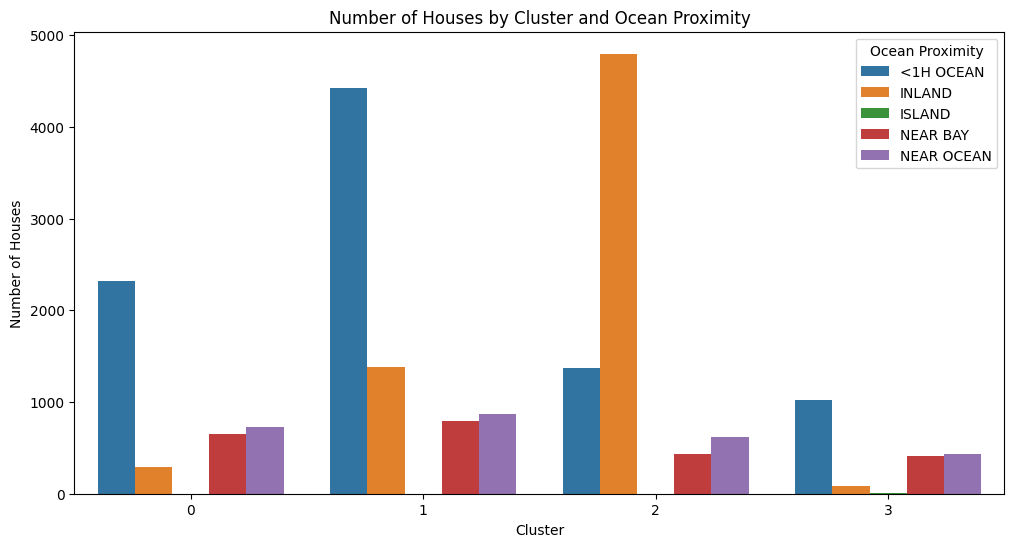

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Calculate the count of houses for each cluster and ocean proximity
cluster_ocean_counts = housing_standard.groupby(['cluster', 'ocean_proximity']).size().reset_index(name='count')

# Create a grouped bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=cluster_ocean_counts, x='cluster', y='count', hue='ocean_proximity')
plt.title('Number of Houses by Cluster and Ocean Proximity')
plt.xlabel('Cluster')
plt.ylabel('Number of Houses')
plt.legend(title='Ocean Proximity')
plt.show()

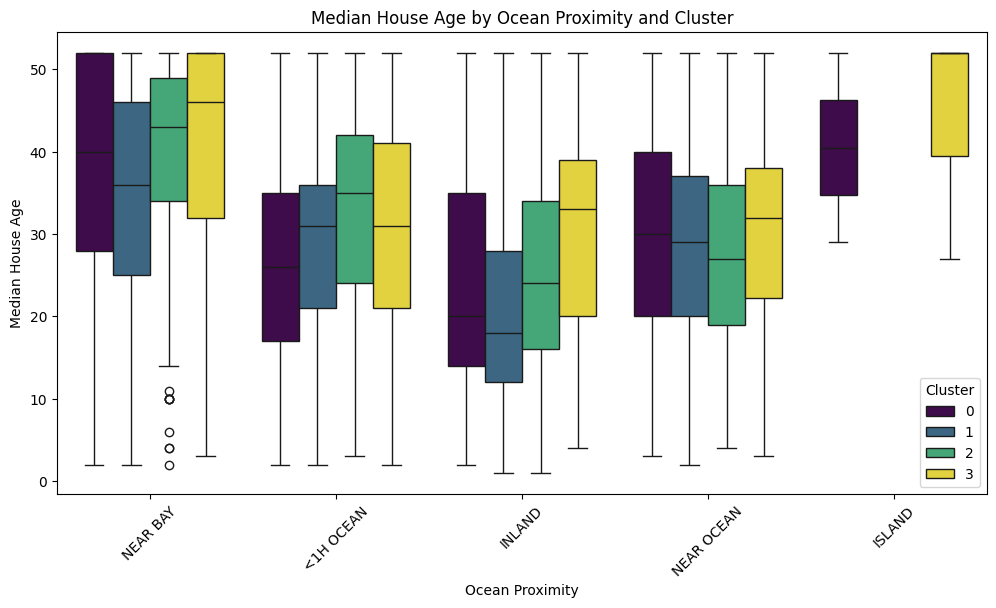

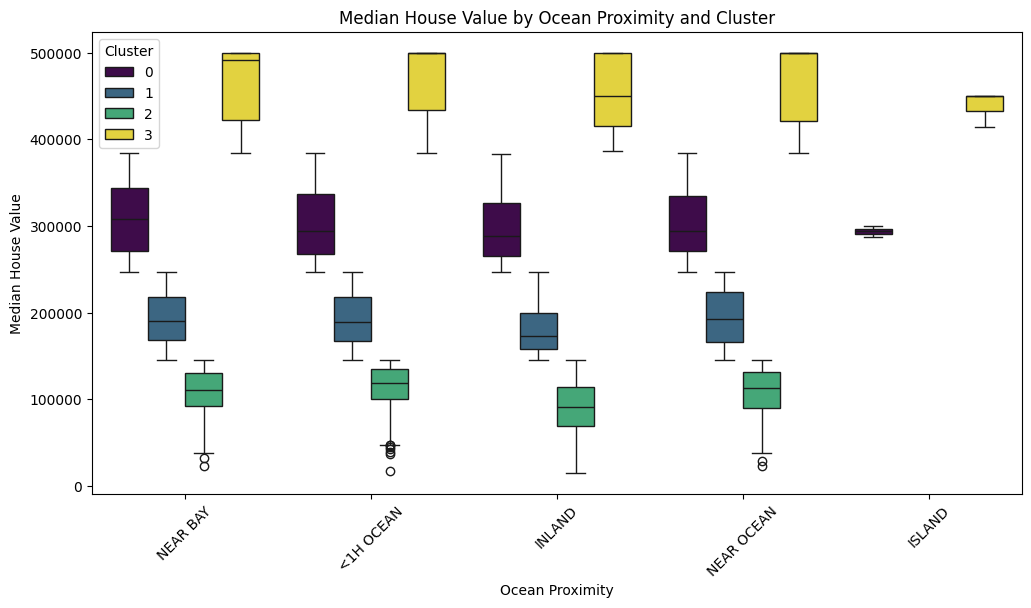

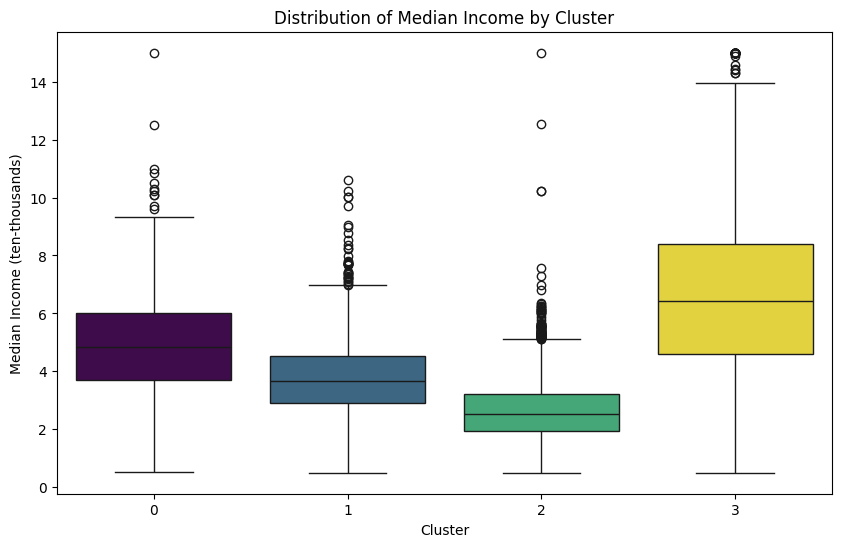

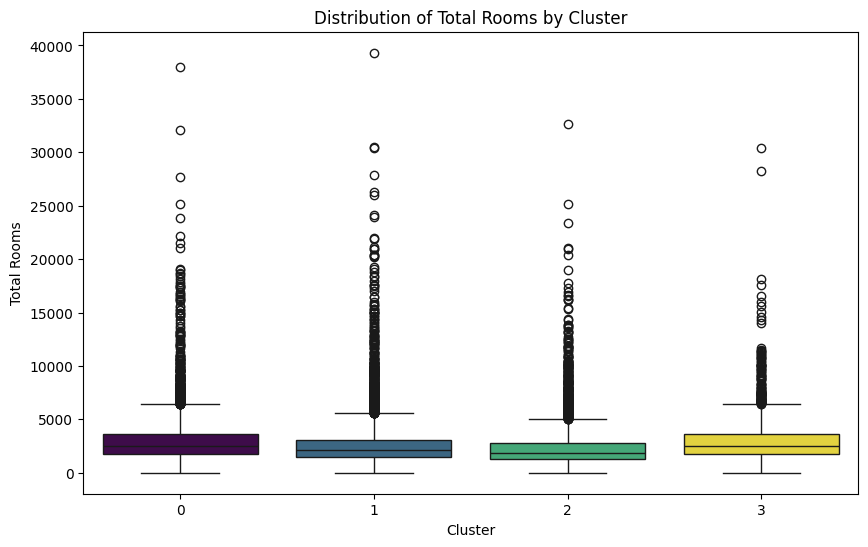

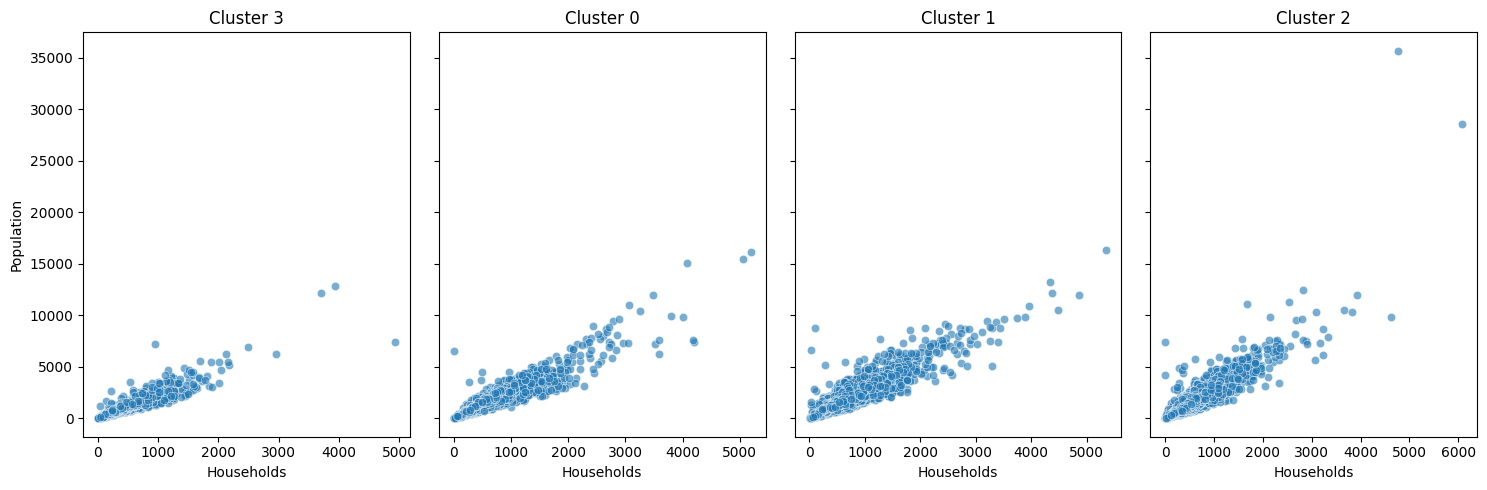

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns
# Create a single box plot with cluster as hue
plt.figure(figsize=(12, 6))
sns.boxplot(data=housing_standard, x='ocean_proximity', y='housing_median_age', hue='cluster', palette='viridis')

plt.title('Median House Age by Ocean Proximity and Cluster')
plt.xlabel('Ocean Proximity')
plt.ylabel('Median House Age')
plt.xticks(rotation=45)
plt.legend(title='Cluster')


# Median House Value
plt.figure(figsize=(12, 6))
sns.boxplot(data=housing_standard, x='ocean_proximity', y='median_house_value', hue='cluster', palette='viridis')

plt.title('Median House Value by Ocean Proximity and Cluster')
plt.xlabel('Ocean Proximity')
plt.ylabel('Median House Value')
plt.xticks(rotation=45)
plt.legend(title='Cluster')

#Median Income
plt.figure(figsize=(10, 6))
sns.boxplot(data=housing_standard, x='cluster', y='median_income', hue='cluster', palette='viridis', legend=False)
plt.title('Distribution of Median Income by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Median Income (ten-thousands)')

# Total Rooms
plt.figure(figsize=(10, 6))
sns.boxplot(data=housing_standard, x='cluster', y='total_rooms', hue='cluster', palette='viridis', legend=False)
plt.title('Distribution of Total Rooms by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Total Rooms')

#Population
clusters = housing_standard['cluster'].unique()

# Create subplots for each cluster
fig, axes = plt.subplots(1, len(clusters), figsize=(15, 5), sharey=True)

# Iterate through each cluster and create a scatter plot
for i, cluster in enumerate(clusters):
    sns.scatterplot(data=housing_standard[housing_standard['cluster'] == cluster],
                    x='households', y='population', ax=axes[i], alpha=0.6)
    axes[i].set_title(f'Cluster {cluster}')
    axes[i].set_xlabel('Households')
    axes[i].set_ylabel('Population')

plt.tight_layout()
plt.show()

**Cluster 0** is more prevelant in the areas `Near_Bay` and `Near_Ocean`, but also i `<1H Ocean`. This cluster has the highest median house valuage across the different `ocean proximity` area; which supported by the cluster also having higher median incomes. The population of is not the largest, the scatter plot between the population and household suggest a larger household size. In summary: Cluster 0 seems to encompass a higher-value properties and higher income households with more housing near the oceans and bay area. The individuals of this cluster might be more of the higher-wealthy economic class group.

**Cluster 1** Is where most of the population resides and the cluster's median house values and median incomes falls more within the middle range compared to the other clusters. There are significantly more `<1H Ocean` homes. With the house median age being between 15 to 35 years old. The average household for cluster 1 in relation to the population remains relatively consistently linear. In summary:  I would likely guess that this cluster encompassing a significant portion of the middle class, residing predominantly in areas within an hour's drive of the ocean.

 **Cluster 2** has more strong ties with `Inland` locations with the median house values and the median income being on the lower side compared to the other clusters.The median income is between $20k-$40k (lower side) with the outliers being significantly more. The household to population scatter plot shows a consistent smaller average household size - most commonly seen in residential areas.

**Cluster 3** has more of a presence in `Near Bay` and `Near Ocean`, similar to that of Cluster 0. However, there are some differences between the two clusters. The median house value is the highest compared to the other cluster with the values being between $400k-$500k. The median income for this group is the highest with the box being encompass between $40k - $80k. The houses in this cluster seems to be older than the other `ocean proximity` categories compared to the other clusters. There also seem to be a higher average of total rooms for these houses in the clusters.